### Data visualization

In [397]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from PIL import Image

In [398]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("tab20b")

palette='tab20b'
primary_color = sns.color_palette('tab20b')[0]
title_fontsize = '25'

In [399]:
image_folder_path = '../images/aculei-images/'
csv_path = '../datasets/aculei.csv'

In [400]:
df = pd.read_csv(csv_path, index_col=0)

In [401]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [402]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

In [403]:
# useful fun
def to_percent(y, _):
    return '{:.0f}%'.format(y * 100)

### Some insigths about the data

In [404]:
df.shape

(16874, 7)

In [405]:
df.sample(5)

image_name camera           date_time        date  \
864     TF_ACULEI_4315_DSCF4579.jpg  CAM_1 2021-06-17 23:20:13  2021-06-17   
5669   TF_ACULEI_15964_DSCF0574.jpg  CAM_4 2023-05-29 02:45:08  2023-05-29   
11147   TF_ACULEI_3511_DSCF3729.jpg  CAM_1 2021-06-15 23:10:06  2021-06-15   
11047  TF_ACULEI_12536_DSCF0050.jpg  CAM_4 2022-11-12 17:45:55  2022-11-12   
9853    TF_ACULEI_8567_DSCF0648.jpg  CAM_1 2021-07-28 04:02:18  2021-07-28   

           time            moon  temp  
864    23:20:13   First Quarter  20.0  
5669   02:45:08   First Quarter  12.0  
11147  23:10:06   First Quarter  20.0  
11047  17:45:55  Waning Gibbous  10.0  
9853   04:02:18  Waning Gibbous  21.0

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 3154 to 16622
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   image_name  16874 non-null  object        
 1   camera      16219 non-null  object        
 2   date_time   16862 non-null  datetime64[ns]
 3   date        16862 non-null  object        
 4   time        16862 non-null  object        
 5   moon        16862 non-null  object        
 6   temp        14063 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.0+ MB


In [407]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera         655
date_time       12
date            12
time            12
moon            12
temp          2811
dtype: int64


In [408]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

CAM_1    9076
CAM_4    2764
CAM_6    1559
CAM_5    1139
CAM_3     995
CAM_7     498
CAM_2     188
Name: camera, dtype: int64


In [409]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [410]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2704
First Quarter      2620
Waxing Gibbous     2125
Waning Crescent    2052
Waning Gibbous     2045
Last Quarter       1873
New Moon           1774
Waxing Crescent    1669
Name: moon, dtype: int64


### Data visualization

In [411]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [412]:
df.head()

image_name camera           date_time       date  \
3154   TF_ACULEI_8015_DSCF0104.jpg  CAM_1 2021-07-22 23:00:19 2021-07-22   
16446  TF_ACULEI_6240_DSCF6583.jpg  CAM_1 2021-06-25 00:35:09 2021-06-25   
6538   TF_ACULEI_6185_DSCF6528.jpg  CAM_1 2021-06-25 00:21:20 2021-06-25   
11198  TF_ACULEI_6354_DSCF6697.jpg  CAM_1 2021-06-25 01:01:05 2021-06-25   
474    TF_ACULEI_6329_DSCF6672.jpg  CAM_1 2021-06-25 00:55:49 2021-06-25   

           time       moon  temp    month  year         day  
3154   23:00:19  Full Moon  25.0  2021-07  2021  2021-07-22  
16446  00:35:09  Full Moon  22.0  2021-06  2021  2021-06-25  
6538   00:21:20  Full Moon  22.0  2021-06  2021  2021-06-25  
11198  01:01:05  Full Moon  22.0  2021-06  2021  2021-06-25  
474    00:55:49  Full Moon  22.0  2021-06  2021  2021-06-25

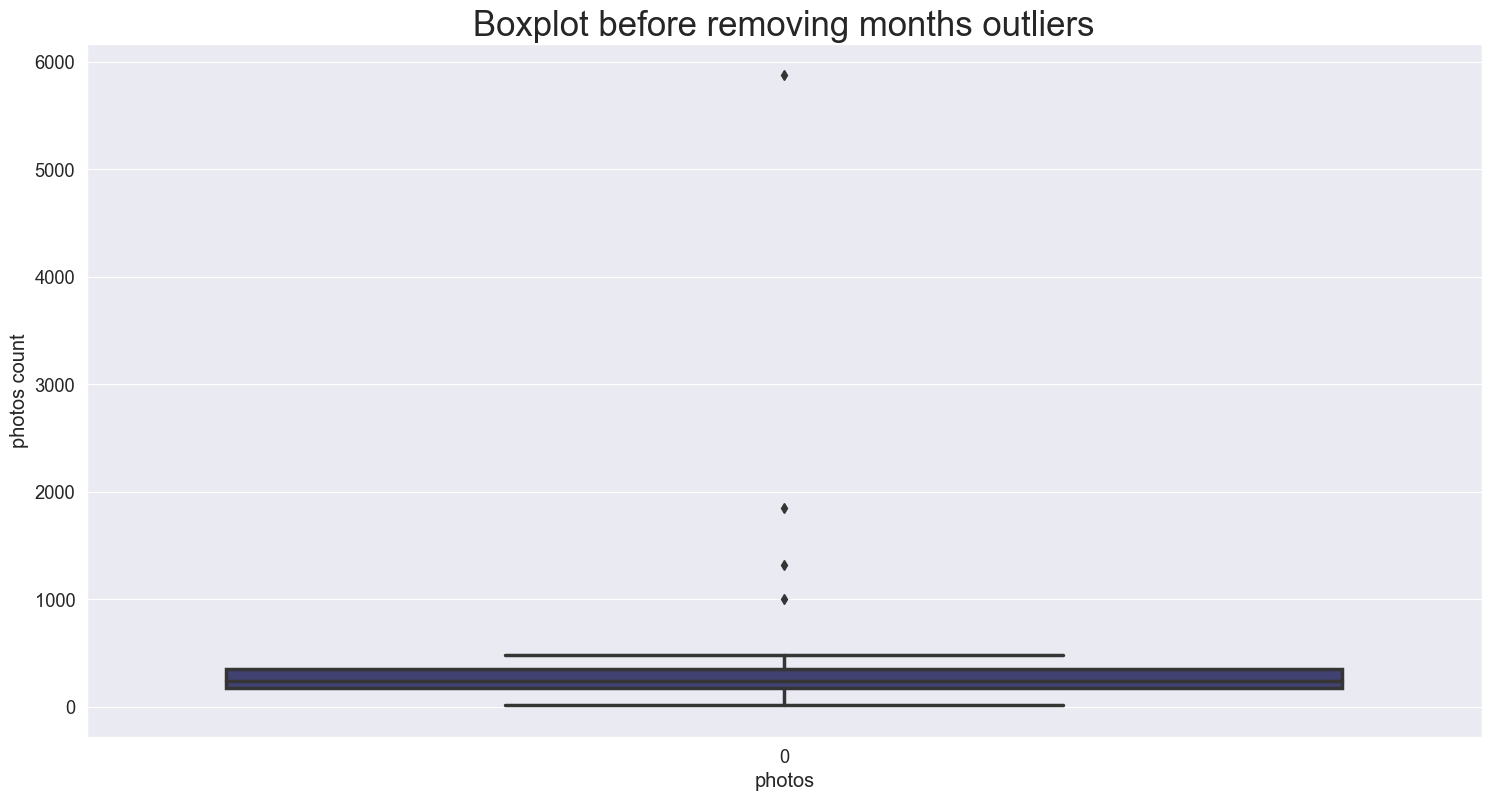

In [413]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [414]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

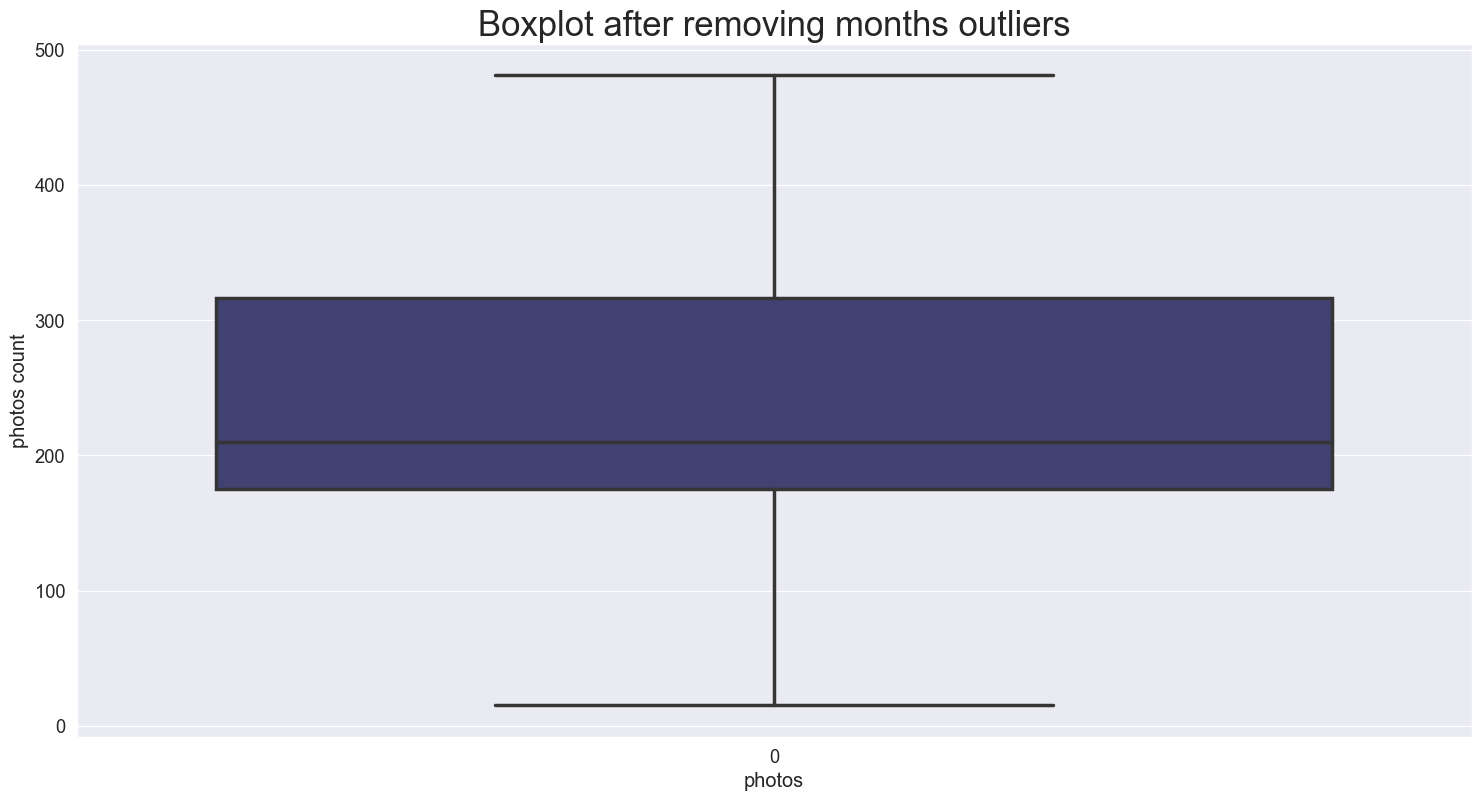

In [415]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

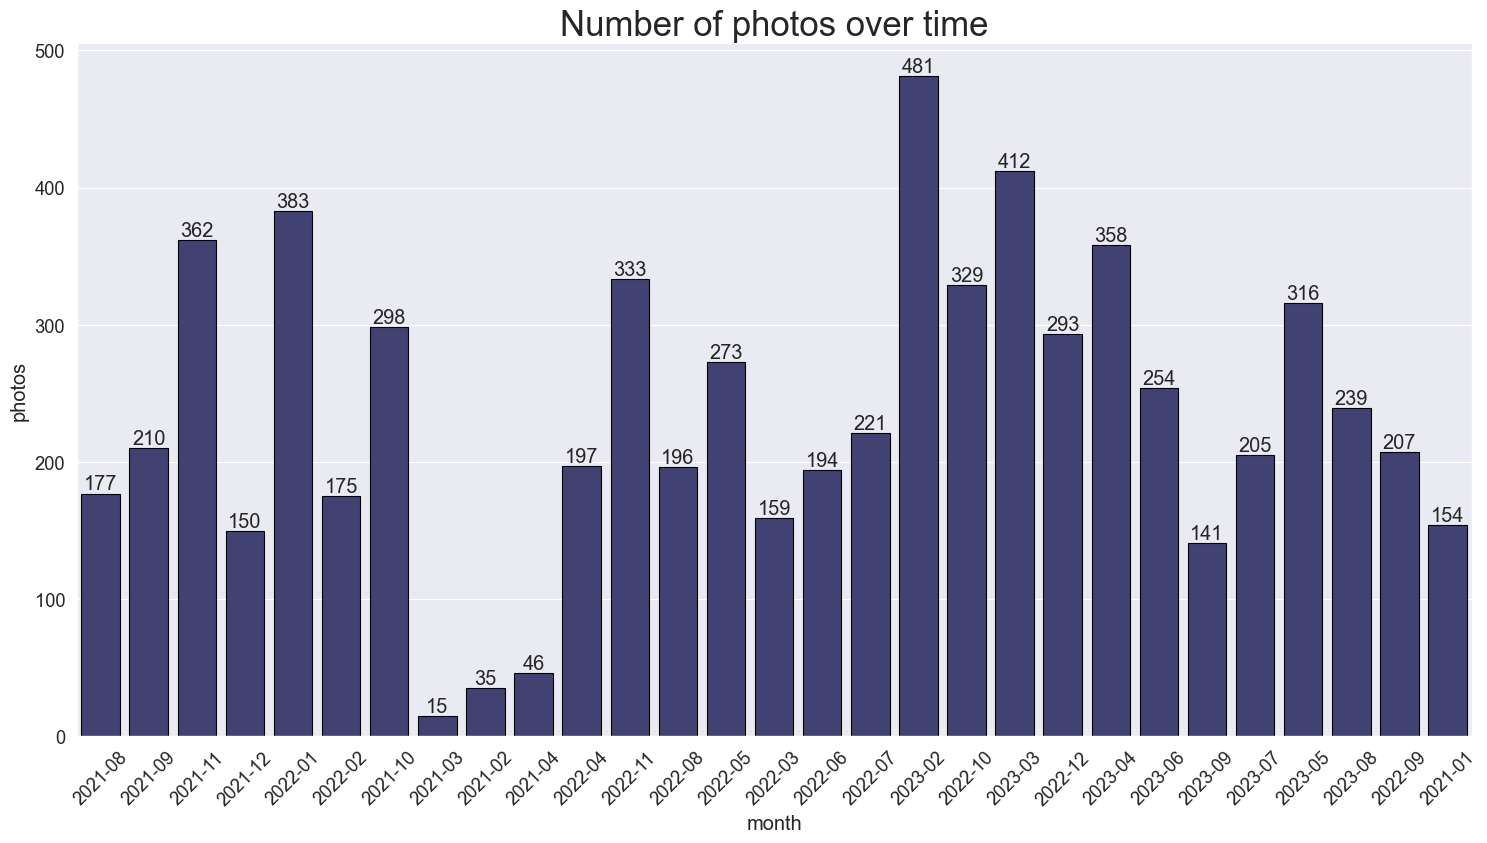

In [416]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', ec='black', color=primary_color)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

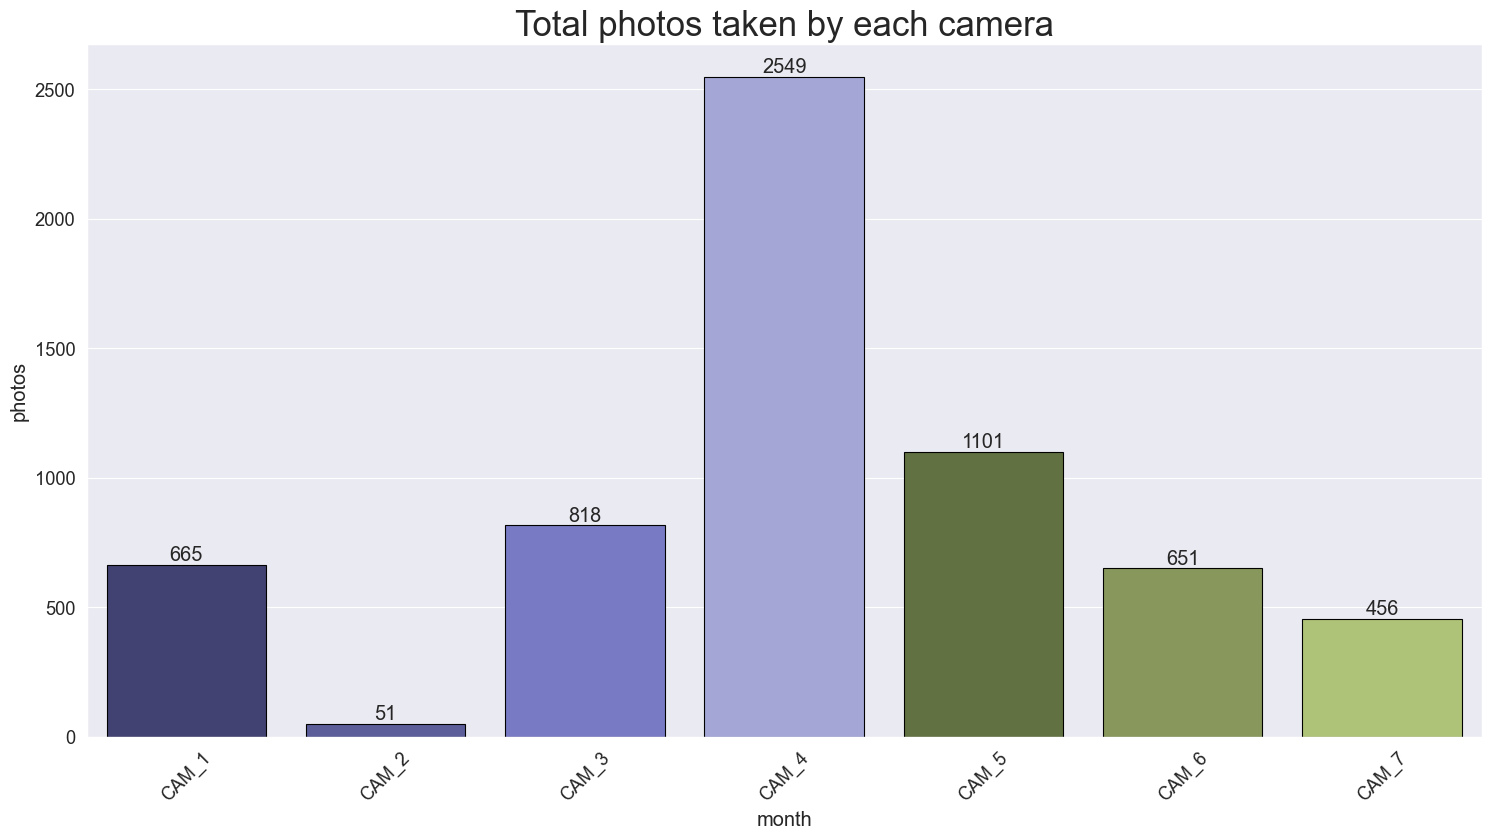

In [417]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera', ec='black')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

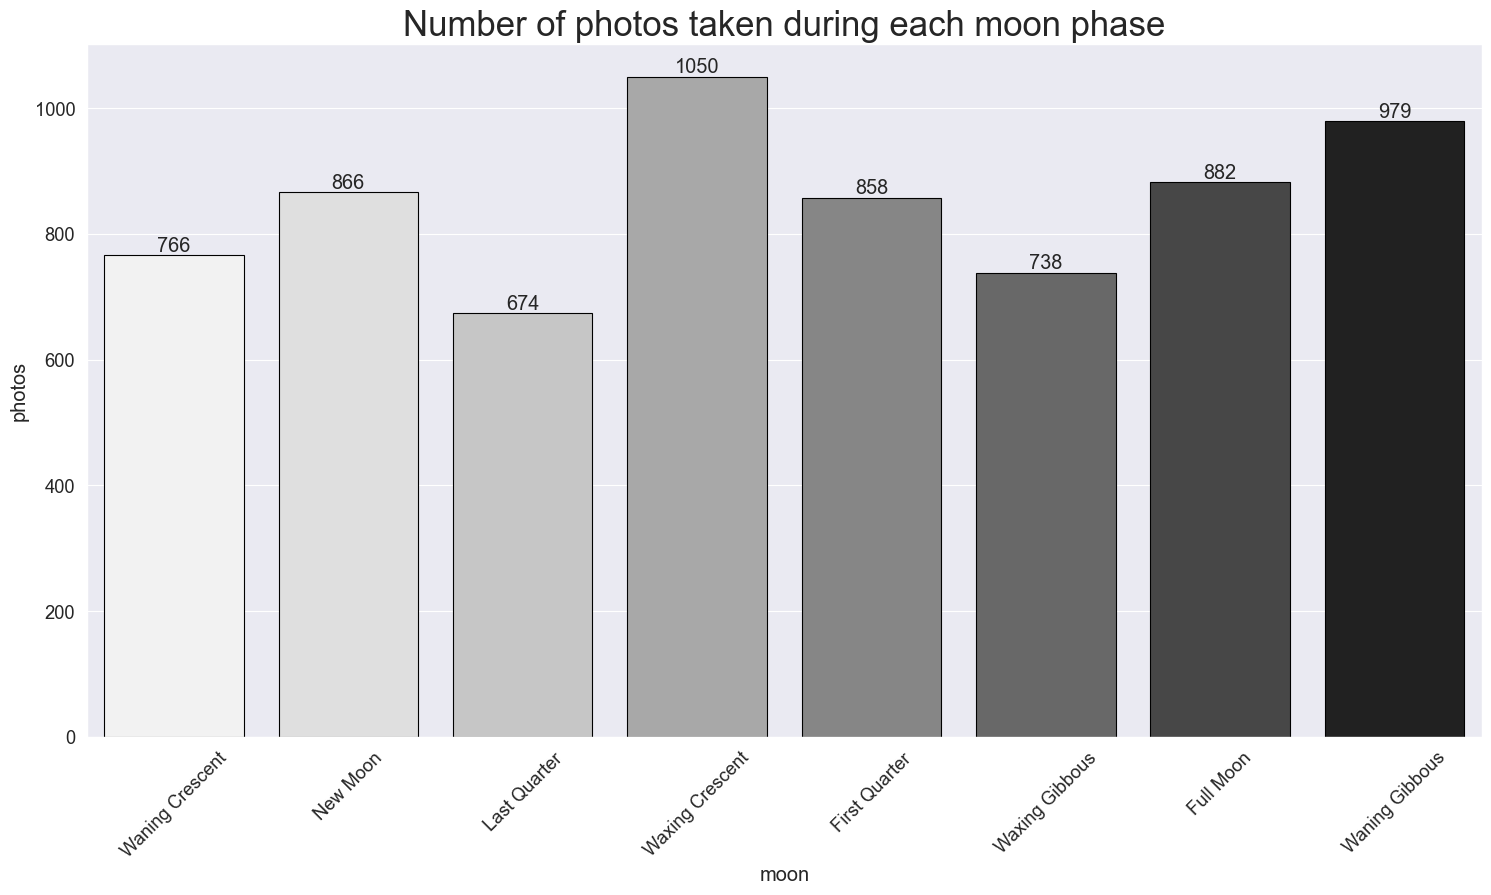

In [418]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon', palette='Greys', ec='black')

plt.title('Number of photos taken during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

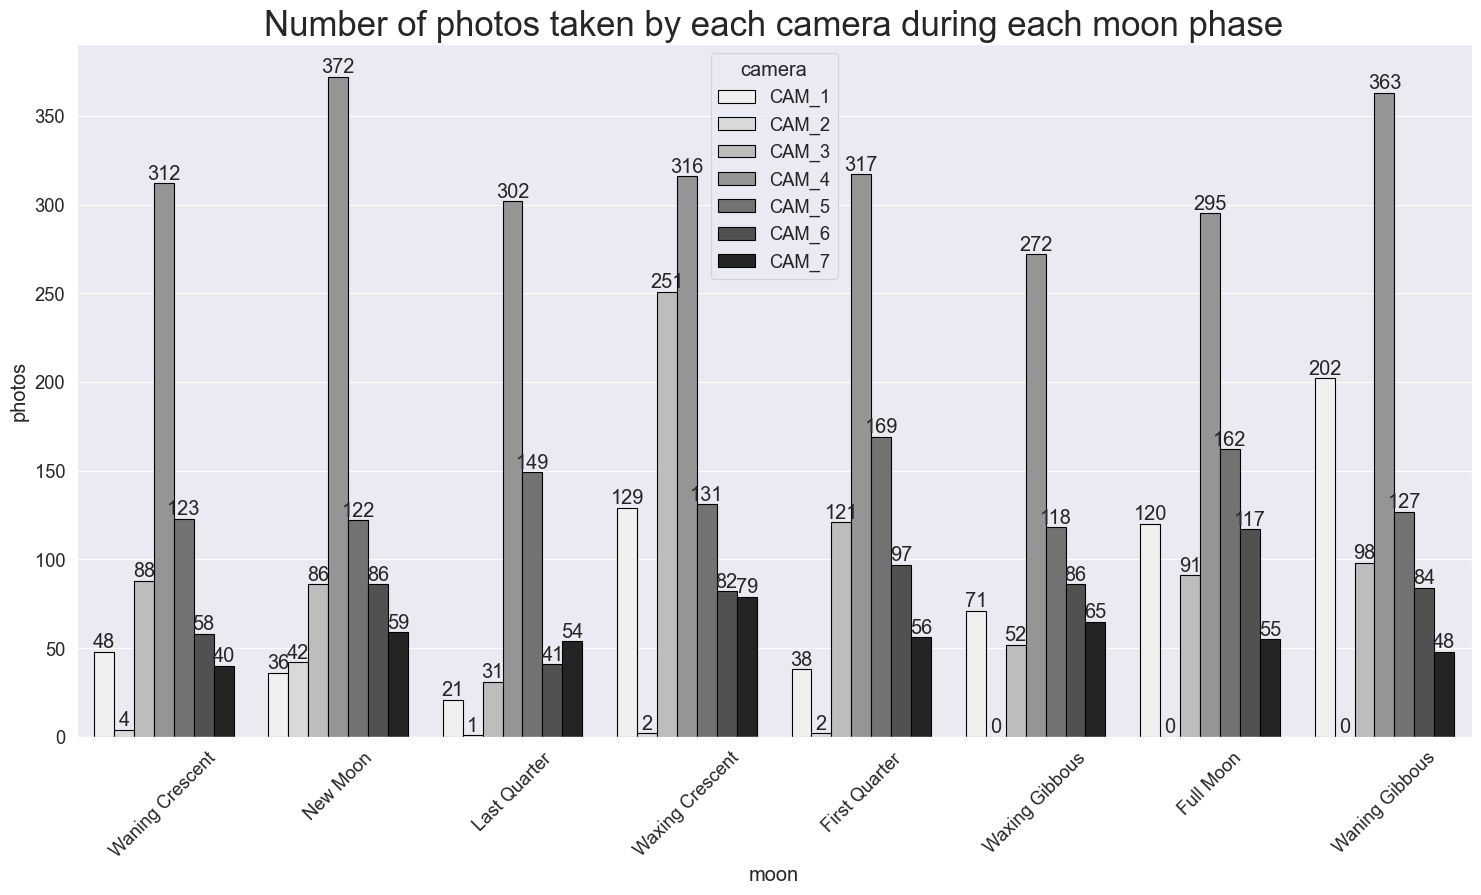

In [419]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera', palette='Greys', ec='black')

plt.title('Number of photos taken by each camera during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

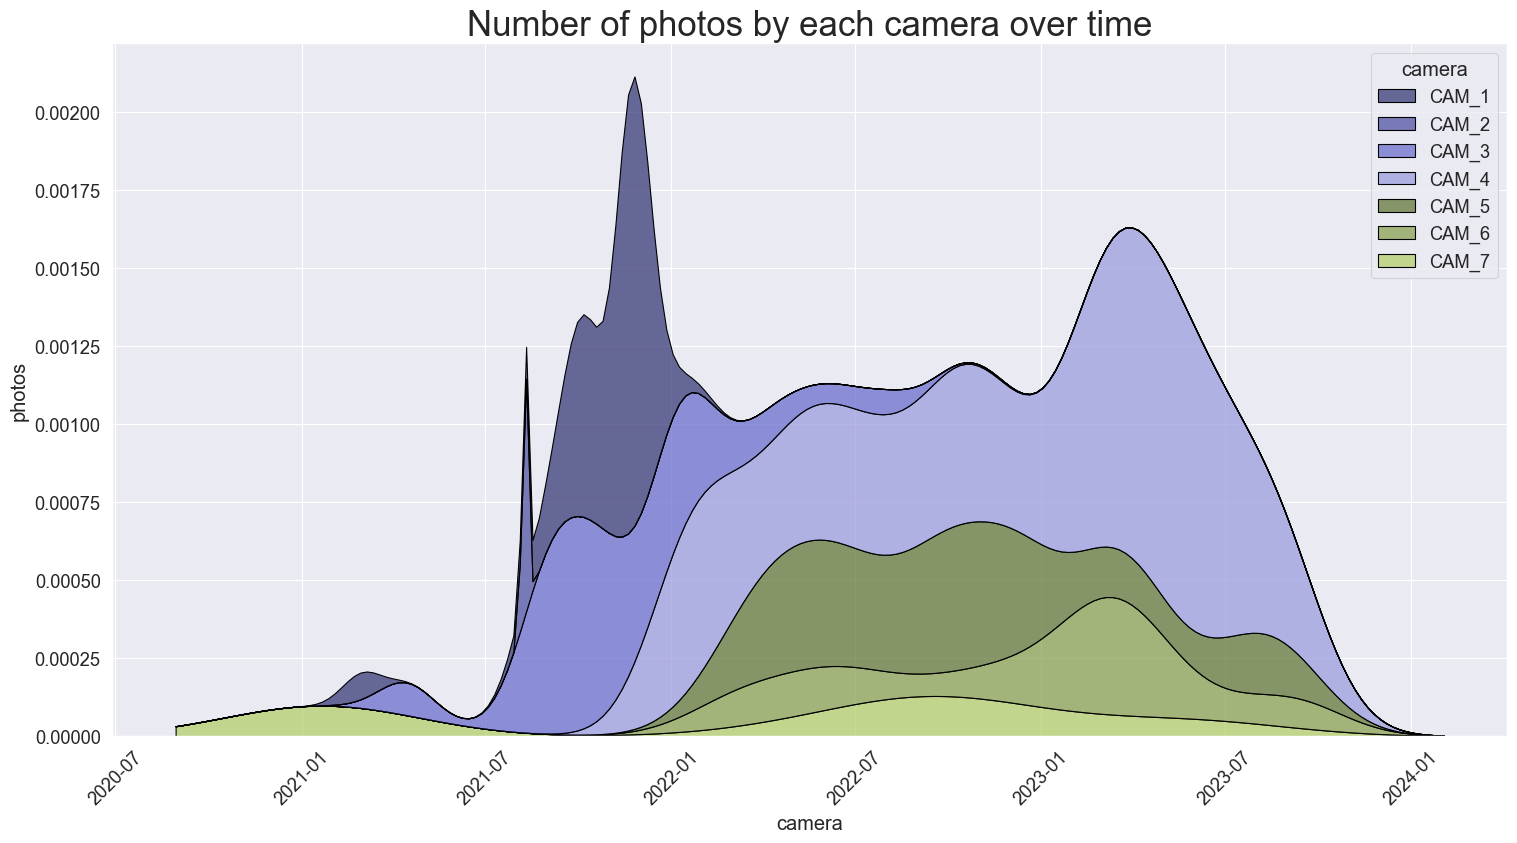

In [420]:
plt.figure(figsize=(18, 9))
sns.kdeplot(data=df, x="date_time", hue="camera", multiple="stack", ec='black')
plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('camera')
plt.xticks(rotation=45)

plt.show()

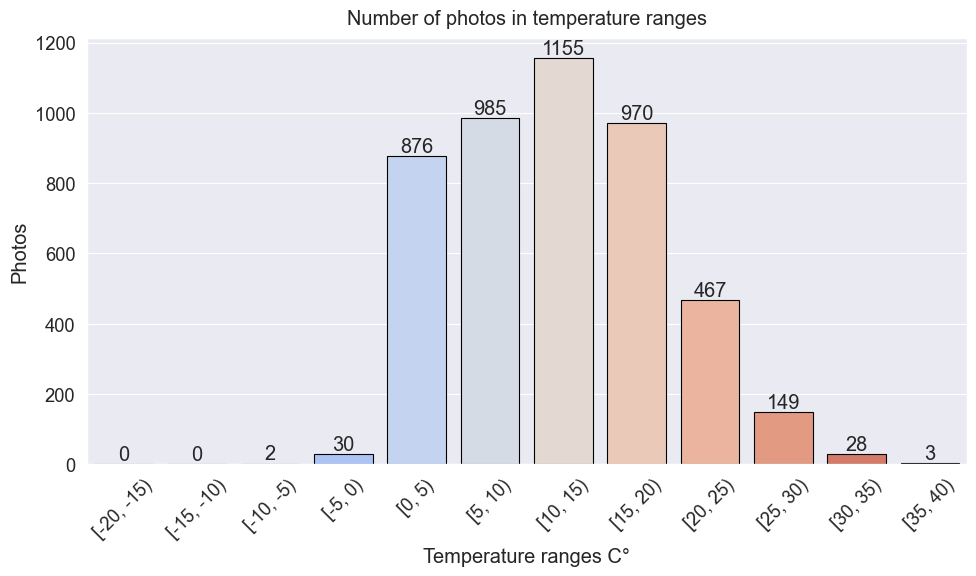

In [421]:
temperature_ranges = range(-20, 45, 5)

# Create a new column with temperature ranges
df['temp_range'] = pd.cut(df['temp'], bins=temperature_ranges, right=False)

# Group by temperature ranges and count occurrences
grouped_data = df.groupby('temp_range').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='temp_range', y='count', data=grouped_data, palette='coolwarm', ec='black')
plt.title('Number of photos in temperature ranges', pad=10)
plt.xlabel('Temperature ranges C°')
plt.ylabel('Photos')
plt.xticks(rotation=45)
plt.tight_layout()

ax.bar_label(ax.containers[0])
plt.show()


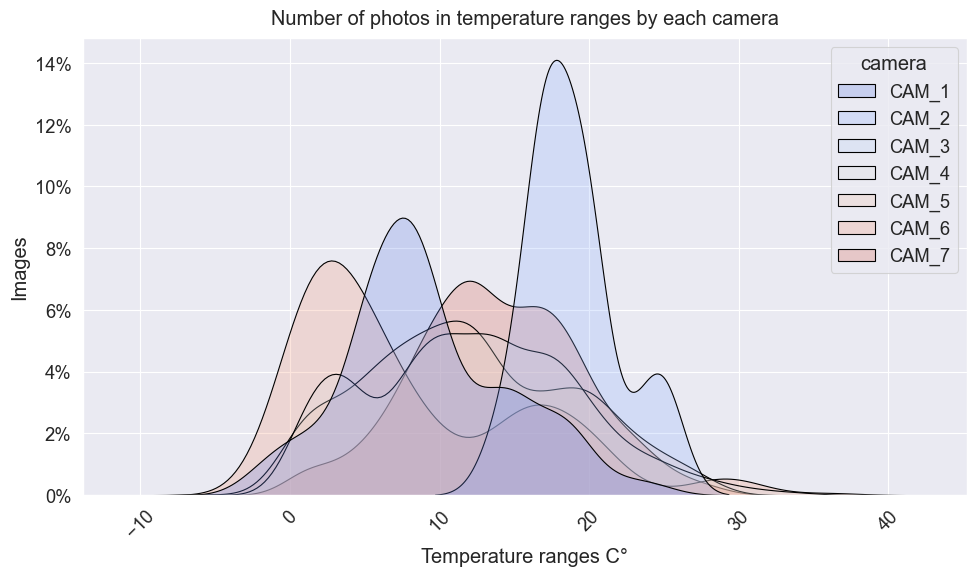

In [422]:
grouped_data = df.groupby(['temp_range', 'camera']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=df, x='temp', hue='camera', fill=True, palette='coolwarm', ec='black', common_norm=False)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

plt.title('Number of photos in temperature ranges by each camera', pad=10)
plt.xlabel('Temperature ranges C°')
plt.ylabel('Images')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()


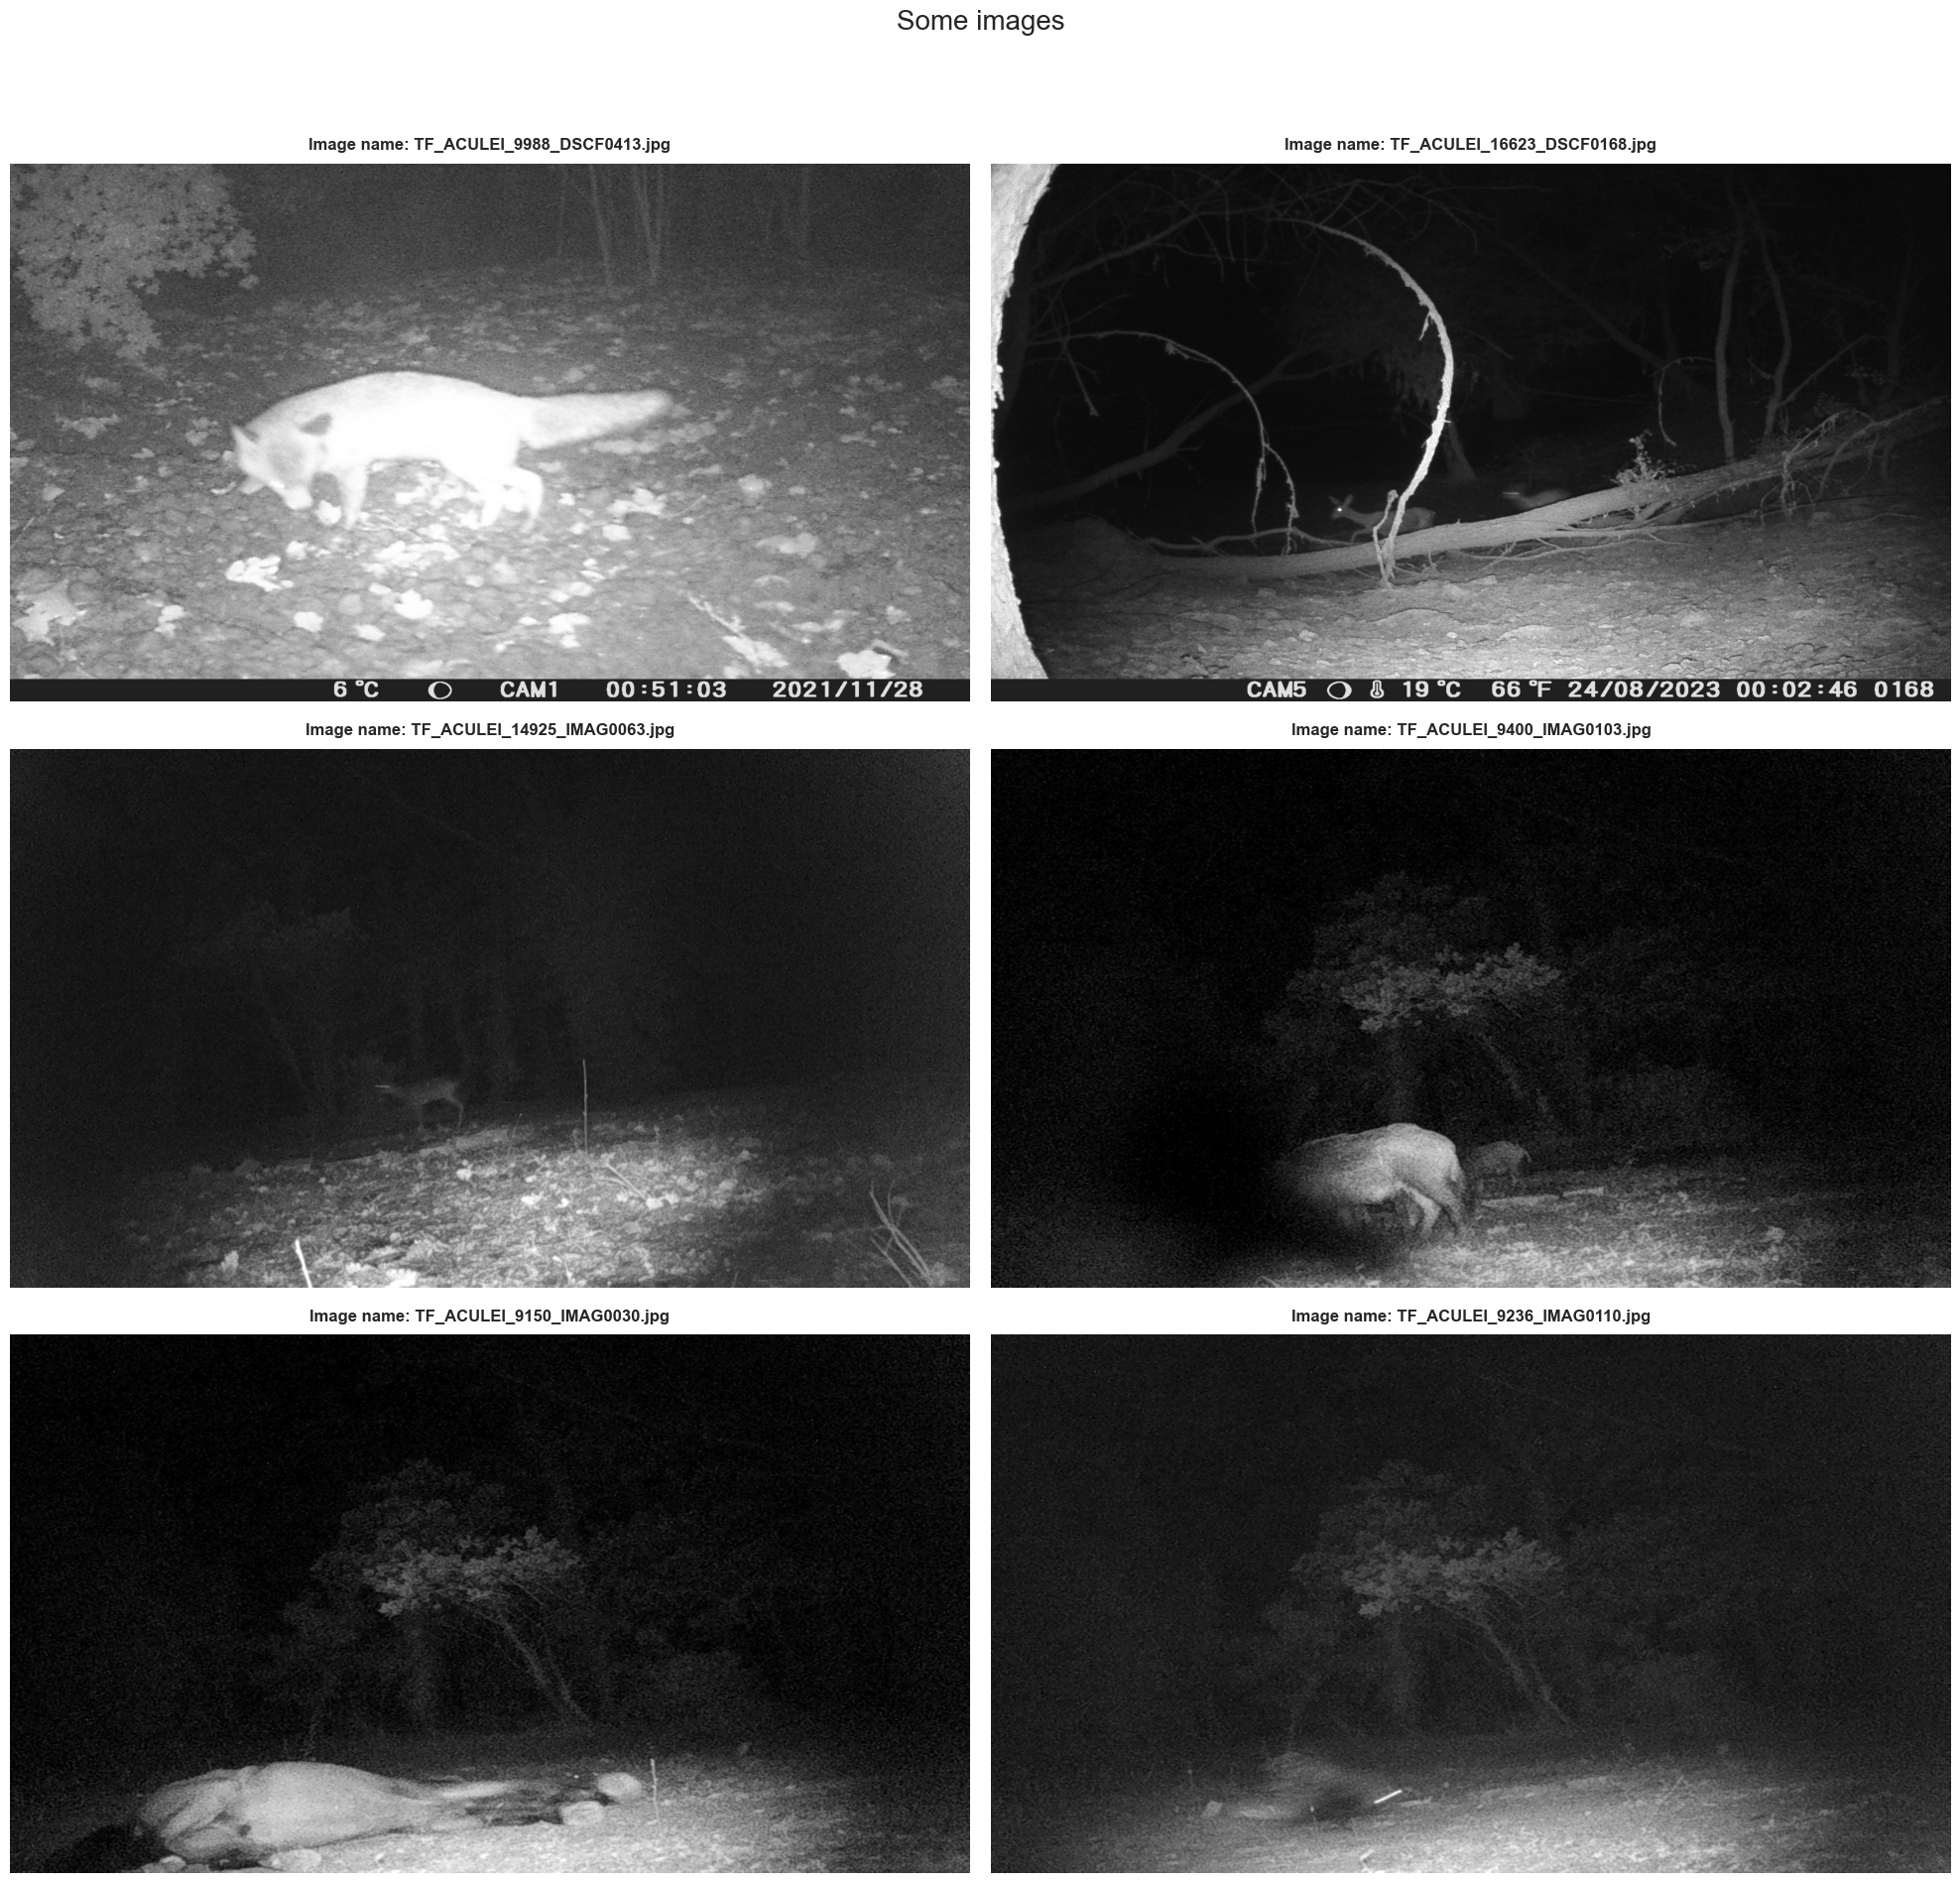

In [423]:
valid_rows = df.sample(6)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Some images', fontsize=20)

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    
for i, ax in enumerate(axes):
    image_path = os.path.join(image_folder_path, valid_rows.iloc[i]['image_name'])
    image = Image.open(image_path)
    ax.imshow(image, aspect='auto')
    ax.axis('off')

    image_name = valid_rows.iloc[i]['image_name']
    ax.set_title(f"Image name: {image_name}", fontsize=12, fontweight='bold', pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()